In [1]:
import pandas as pd
import pickle
import datetime as dt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
#from LogIn import LogIn
#kite = LogIn().return_kite_obj()

In [3]:
budget_df = pd.read_csv('budget.csv')

In [4]:
budget_df['return'] = 0.05

In [5]:
budget_df

,instrument,budget,return
0,NSE:UNIONBANK,400,0.05
1,NSE:DCBBANK,400,0.05
2,NSE:YESBANK,400,0.05
3,NSE:WIPRO,400,0.05
4,NSE:TATASTEEL,400,0.05
5,NSE:SBIN,400,0.05
6,NSE:PNB,400,0.05
7,NSE:ONGC,400,0.05
8,NSE:OIL,400,0.05
9,NSE:NTPC,400,0.05


# Inputs

In [6]:
from_year = 2015
to_year = 2018

In [7]:
leverage = 15
exit_time = dt.time(15, 10)

# Process

In [8]:
# Download data of all companies
download = False

if download:
    
    for year in range(from_year, to_year+1):
        
        from_date = '{}-01-01'.format(year)
        to_date = '{}-12-31'.format(year)
        print(from_date, to_date)
        for instrument in budget_df.instrument.tolist():

            try:
                print('------------')
                print(instrument)
                instrument_token = kite.ohlc(instrument)[instrument]['instrument_token']
                data = kite.historical_data(instrument_token=instrument_token, from_date=from_date, to_date=to_date, interval='minute', continuous=False)
                data_df = pd.DataFrame(data)
                data_df.to_pickle('./data/{}_{}_{}.pkl'.format(instrument, from_date, to_date))

            except Exception as ex:
                print('Failed for {} : {}'.format(instrument, ex))

In [9]:
def get_clean_data(instrument, from_year, to_year):
    
    print(instrument)
    
    all_data_df = pd.DataFrame()
    
    for year in range(from_year, to_year+1):
        
        print(year)
        
        from_date = '{}-01-01'.format(year)
        to_date = '{}-12-31'.format(year)
        
        data_df = pd.read_pickle('./data/{}_{}_{}.pkl'.format(instrument, from_date, to_date))
        data_df.rename(columns={'date':'timestamp'}, inplace=True)
        data_df['date'] = data_df['timestamp'].dt.date
        data_df['day'] = data_df['timestamp'].dt.day_name()
        print(len(data_df))

        sanity_check = data_df.groupby('date').count().reset_index()
        incomplete_data_days = sanity_check[sanity_check['volume']<300]
        print(incomplete_data_days)

        data_df = data_df[~data_df['date'].isin(incomplete_data_days.date.tolist())]
        data_df['instrument'] = instrument
        print(len(data_df)/375)
        
        all_data_df = all_data_df.append(data_df, ignore_index=True)
        
    return all_data_df

In [10]:
header_list = ['instrument', 'high_prev', 'low_prev', 'open_today', 'condition', 'transaction_type', 'trade_number', 'level', 'budget', 'return', 'daily_khwab', 'actual_khwab', 'quantity', 'budget_required', 'price', 'trigger_price', 'squareoff', 'stoploss', 'order_id', 'timestamp', 'order_type', 'status', 'profit', 'pl_tag', 'flag', 'adhoora_khwab']


In [11]:
calculate = False

if calculate:
    
    all_trades = pd.DataFrame(columns=header_list)

    for instrument in budget_df.instrument.tolist():

        try:
            all_data_df = get_clean_data(instrument, from_year, to_year)

            for i in range(len(all_data_df.date.unique().tolist())-1):

                date_prev = all_data_df.date.unique().tolist()[i]
                data_prev = all_data_df[all_data_df['date']==date_prev]
                open_prev = data_prev.open.iloc[0]
                close_prev = data_prev.open.iloc[-1]
                high_prev = data_prev.high.max()
                low_prev = data_prev.low.min()

                date_today = all_data_df.date.unique().tolist()[i+1]
                data_today = all_data_df[all_data_df['date']==date_today]

                # Trim beyond exit time
                data_today = data_today[data_today['timestamp'].dt.time<exit_time]
                open_today = data_today.open.iloc[0]

                if (open_today > high_prev) & (open_today < 1.15 * high_prev):

                    condition = 'high'
                    transaction_type = 'sell'

                elif (open_today < low_prev) & (open_today > 0.85 * low_prev):

                    condition = 'low'
                    transaction_type = 'buy'

                else:

                    condition = None
                    transaction_type = None

                if condition is not None:

                    valid_trades = all_trades[(all_trades['instrument']==instrument) & (all_trades['condition']==condition) & (all_trades['status']=='complete')]
                    last_valid_trade = valid_trades[valid_trades['trade_number']==valid_trades['trade_number'].max()]

                    # Calculate trade number
                    if len(last_valid_trade):
                        trade_number = int(last_valid_trade['trade_number']) + 1
                    else:
                        trade_number = 1
                    
                    # Calculate level
                    if len(last_valid_trade):
                        if float(last_valid_trade['pl_tag'])==1.0:
                            level = 1
                        else:
                            level = float(last_valid_trade['level']) + 1
                    else:
                        level = 1

                    # Calculate budget and return
                    if level==1:
                        budget = float(budget_df[budget_df['instrument']==instrument]['budget'])
                        return_ = float(budget_df[budget_df['instrument']==instrument]['return'])
                    else:
                        budget = float(last_valid_trade['budget'])
                        return_ = float(last_valid_trade['return'])

                    # Calculate daily khwab
                    if len(last_valid_trade):
                        if int(last_valid_trade['flag'])==1:
                            daily_khwab = round(return_ * budget, 2)
                        else:
                            daily_khwab = 0
                    else:
                        daily_khwab = round(return_ * budget, 2)

                    # Calculate actual khwab
                    if len(last_valid_trade):
                        actual_khwab = max(round(float(last_valid_trade['adhoora_khwab']) + daily_khwab, 2), round(return_ * budget, 2))
                    else:
                        actual_khwab = round(return_ * budget, 2)

                    # Caluclate tax
                    tax = 3 * (0.0005647 * actual_khwab)/return_
                    actual_khwab = round(actual_khwab + tax, 2)
                    
                    # Calculate quantity
                    quantity = int(round(actual_khwab/(return_ * open_today)))

                    # Calculate budget required
                    budget_required = round(quantity * open_today, 2)

                    # Calculate price and trigger price
                    if transaction_type=='buy':
                        price = round(open_today + 0.05 * max(round(20 * 0.0010 * open_today), 2), 2)
                        trigger_price = round(open_today + 0.05 * max(round(20 * 0.0005 * open_today),1), 2)
                    else:
                        price = round(open_today - 0.05 * max(round(20 * 0.0010 * open_today), 2), 2)
                        trigger_price = round(open_today - 0.05 * max(round(20 * 0.0005 * open_today),1), 2)

                    # Calculate square off and stoploss
                    squareoff = round(return_ * price, 1)
                    stoploss = round(return_ * price, 1)

                    # Calculate order_id, order_type
                    order_id = trade_number
                    order_type = 'SL'

                    # Calculate timestamp, status and profit
                    if transaction_type=='buy':
                        
                        if data_today.high.max() < trigger_price:

                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['high'] > price + squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['low'] < price - stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((row['close']-price) * quantity, 2)

                    else:

                        if data_today.low.min() > trigger_price:
                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0        

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['low'] < price - squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['high'] > price + stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((price - row['close']) * quantity, 2)

                    # Calculate P/L tag
                    pl_tag = round(round(float(profit), 2) / (float(squareoff) * float(quantity)), 1)

                    # Calculate flag
                    if abs(float(pl_tag))==1:
                        flag = 1
                    else:
                        flag = 0

                    # Calculate adhoora khwab
                    adhoora_khwab = round(float(actual_khwab) - profit, 2)

                    trades_today = pd.DataFrame(data={'instrument':[instrument], 
                                                      'high_prev':[high_prev], 
                                                      'low_prev':[low_prev], 
                                                      'open_today':[open_today], 
                                                      'condition':[condition], 
                                                      'transaction_type':[transaction_type], 
                                                      'trade_number':[trade_number], 
                                                      'level':[level], 
                                                      'budget':[budget], 
                                                      'return':[return_], 
                                                      'daily_khwab':[daily_khwab], 
                                                      'actual_khwab':[actual_khwab], 
                                                      'quantity':[quantity], 
                                                      'budget_required':[budget_required], 
                                                      'price':[price], 
                                                      'trigger_price':[trigger_price], 
                                                      'squareoff':[squareoff], 
                                                      'stoploss':[stoploss], 
                                                      'order_id':[order_id], 
                                                      'timestamp':[timestamp], 
                                                      'order_type':[order_type], 
                                                      'status':[status], 
                                                      'profit':[profit], 
                                                      'pl_tag':[pl_tag], 
                                                      'flag':[flag], 
                                                      'adhoora_khwab':[adhoora_khwab]
                                                     })

                    all_trades = all_trades.append(trades_today, ignore_index = True)
        except Exception as ex:
            print('Failed calculation for {} : {}'.format(instrument, ex))
            
    all_trades.to_pickle('all_trades_opp_brokerage_return_{}_{}.pkl'.format(from_year, to_year))
    
else:
    
    all_trades = pd.read_pickle('all_trades_opp_brokerage_return_{}_{}.pkl'.format(from_year, to_year))

# High Trades Analysis

In [15]:
high_trades = all_trades[(all_trades['condition']=='high') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100))]


In [16]:
high_trades_loop = pd.DataFrame()
for instrument in high_trades.instrument.unique().tolist():
    instrument_high_trades = high_trades[high_trades['instrument']==instrument]
    instrument_high_trades_loop = instrument_high_trades[instrument_high_trades['trade_number']<=instrument_high_trades[instrument_high_trades['pl_tag']==1.0].trade_number.max()]
    high_trades_loop = high_trades_loop.append(instrument_high_trades_loop, ignore_index=True)
    

In [17]:
high_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab
337,NSE:YESBANK,168.24,163.12,168.85,high,sell,1,1,400.0,0.05,20.0,20.68,2,337.70,168.70,168.75,8.4,8.4,1,2015-02-13 15:09:00+05:30,SL,complete,3.54,0.2,0,17.14
338,NSE:YESBANK,166.40,161.08,168.00,high,sell,2,2,400.0,0.05,0.0,20.68,2,336.00,167.85,167.90,8.4,8.4,2,2015-02-23 15:09:00+05:30,SL,complete,9.48,0.6,0,11.20
339,NSE:YESBANK,164.90,157.22,165.80,high,sell,3,3,400.0,0.05,0.0,20.68,2,331.60,165.65,165.70,8.3,8.3,3,2015-02-28 15:09:00+05:30,SL,complete,-13.46,-0.8,0,34.14
340,NSE:YESBANK,173.61,162.40,175.19,high,sell,4,4,400.0,0.05,0.0,35.30,4,700.76,174.99,175.09,8.7,8.7,4,2015-03-02 15:09:00+05:30,SL,complete,-6.84,-0.2,0,42.14
341,NSE:YESBANK,176.98,173.00,181.21,high,sell,5,5,400.0,0.05,0.0,43.57,5,906.05,181.01,181.11,9.1,9.1,5,2015-03-04 14:56:00+05:30,SL,complete,45.50,1.0,1,-1.93


In [18]:
high_trades.instrument.nunique()

30

In [34]:
high_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ADANIPORTS,418.85,2725.00
1,NSE:AMBUJACEM,167.05,3548.25
2,NSE:APOLLOTYRE,289.20,1688.40
3,NSE:BERGEPAINT,315.44,2177.10
4,NSE:BHARTIARTL,218.15,3470.60
5,NSE:BPCL,1119.39,28583.98
6,NSE:CADILAHC,508.75,13723.05
7,NSE:CANBK,487.90,3425.95
8,NSE:CASTROLIND,153.85,1490.65
9,NSE:CHOLAFIN,480.55,3744.00


In [35]:
high_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ADANIPORTS,410.35,2725.00
1,NSE:APOLLOTYRE,261.90,1688.40
2,NSE:BERGEPAINT,175.14,2177.10
3,NSE:BHARTIARTL,107.25,2618.00
4,NSE:BPCL,1034.69,28583.98
5,NSE:CADILAHC,241.40,4380.00
6,NSE:CANBK,484.10,3425.95
7,NSE:CASTROLIND,156.33,1490.65
8,NSE:CHOLAFIN,490.50,3744.00
9,NSE:COALINDIA,47.35,1335.00


# Low Trades Analysis

In [19]:
low_trades = all_trades[(all_trades['condition']=='low') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100))]

In [20]:
low_trades_loop = pd.DataFrame()
for instrument in low_trades.instrument.unique().tolist():
    instrument_low_trades = low_trades[low_trades['instrument']==instrument]
    instrument_low_trades_loop = instrument_low_trades[instrument_low_trades['trade_number']<=instrument_low_trades[instrument_low_trades['pl_tag']==1.0].trade_number.max()]
    low_trades_loop = low_trades_loop.append(instrument_low_trades_loop, ignore_index=True)
    

In [21]:
low_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab
336,NSE:YESBANK,161.44,158.21,157.94,low,buy,1,1,400.0,0.05,20.0,20.68,3,473.82,158.09,158.04,7.9,7.9,1,2015-02-10 15:09:00+05:30,SL,complete,15.18,0.6,0,5.50
344,NSE:YESBANK,165.38,160.82,160.20,low,buy,2,2,400.0,0.05,0.0,20.68,3,480.60,160.35,160.30,8.0,8.0,2,2015-03-26 15:09:00+05:30,SL,complete,1.17,0.0,0,19.51
348,NSE:YESBANK,173.11,169.89,169.80,low,buy,3,3,400.0,0.05,0.0,20.68,2,339.60,169.95,169.90,8.5,8.5,3,2015-05-06 15:09:00+05:30,SL,complete,-10.10,-0.6,0,30.78
351,NSE:YESBANK,168.65,160.40,160.00,low,buy,4,4,400.0,0.05,0.0,31.82,4,640.00,160.15,160.10,8.0,8.0,4,2015-06-12 15:09:00+05:30,SL,complete,3.76,0.1,0,28.06
353,NSE:YESBANK,164.73,162.40,162.25,low,buy,5,5,400.0,0.05,0.0,29.01,4,649.00,162.40,162.35,8.1,8.1,5,2015-06-18 15:09:00+05:30,SL,complete,11.04,0.3,0,17.97


In [22]:
low_trades.instrument.nunique()

30

In [36]:
low_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ADANIPORTS,237.75,2788.00
1,NSE:AMBUJACEM,242.15,4592.50
2,NSE:APOLLOTYRE,303.25,1381.50
3,NSE:BERGEPAINT,162.63,4479.30
4,NSE:BHARTIARTL,166.80,2052.75
5,NSE:BPCL,123.80,2943.27
6,NSE:CADILAHC,205.31,2436.70
7,NSE:CANBK,544.50,5805.00
8,NSE:CASTROLIND,169.11,3765.80
9,NSE:CHOLAFIN,121.60,1800.00


In [37]:
low_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ADANIPORTS,213.75,2538.60
1,NSE:AMBUJACEM,252.75,4592.50
2,NSE:APOLLOTYRE,319.15,1248.00
3,NSE:BERGEPAINT,59.63,1321.11
4,NSE:BHARTIARTL,178.60,1001.85
5,NSE:BPCL,88.08,2943.27
6,NSE:CADILAHC,120.96,614.00
7,NSE:CANBK,544.50,5805.00
8,NSE:CASTROLIND,100.41,3355.20
9,NSE:CHOLAFIN,59.35,506.40


# Results

In [23]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades_loop),
                           round(high_trades_loop.profit.sum(), 2), 
                           round(high_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades_loop.budget_required.max()), 
                           round(high_trades_loop.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades_loop),
                          round(low_trades_loop.profit.sum(), 2), 
                          round(low_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades_loop.budget_required.max()),
                          round(low_trades_loop.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,2744.00,1763.00
trades_considered,1683.00,1294.00
profit,7807.97,6728.36
perc_return,27.79,23.94
hightest_budget_required,28584.00,29039.00
hightest_margin_required,1906.00,1936.00


In [24]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades),
                           round(high_trades.profit.sum(), 2), 
                           round(high_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades.budget_required.max()), 
                           round(high_trades.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades),
                          round(low_trades.profit.sum(), 2), 
                          round(low_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades.budget_required.max()),
                          round(low_trades.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,2744.00,1763.00
trades_considered,2744.00,1763.00
profit,11434.07,7650.34
perc_return,40.69,27.23
hightest_budget_required,30399.00,29039.00
hightest_margin_required,2027.00,1936.00


# Daily Margin Required Analysis

In [27]:
all_trades['date'] = all_trades['timestamp'].dt.date
all_trades['margin_required'] = all_trades['budget_required']/leverage
margins = all_trades.groupby('date').agg({'budget_required':sum, 'margin_required':sum, 'instrument':list}).reset_index()

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels, rotation='vertical')

    if y_label:
        plt.ylabel(y_label)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

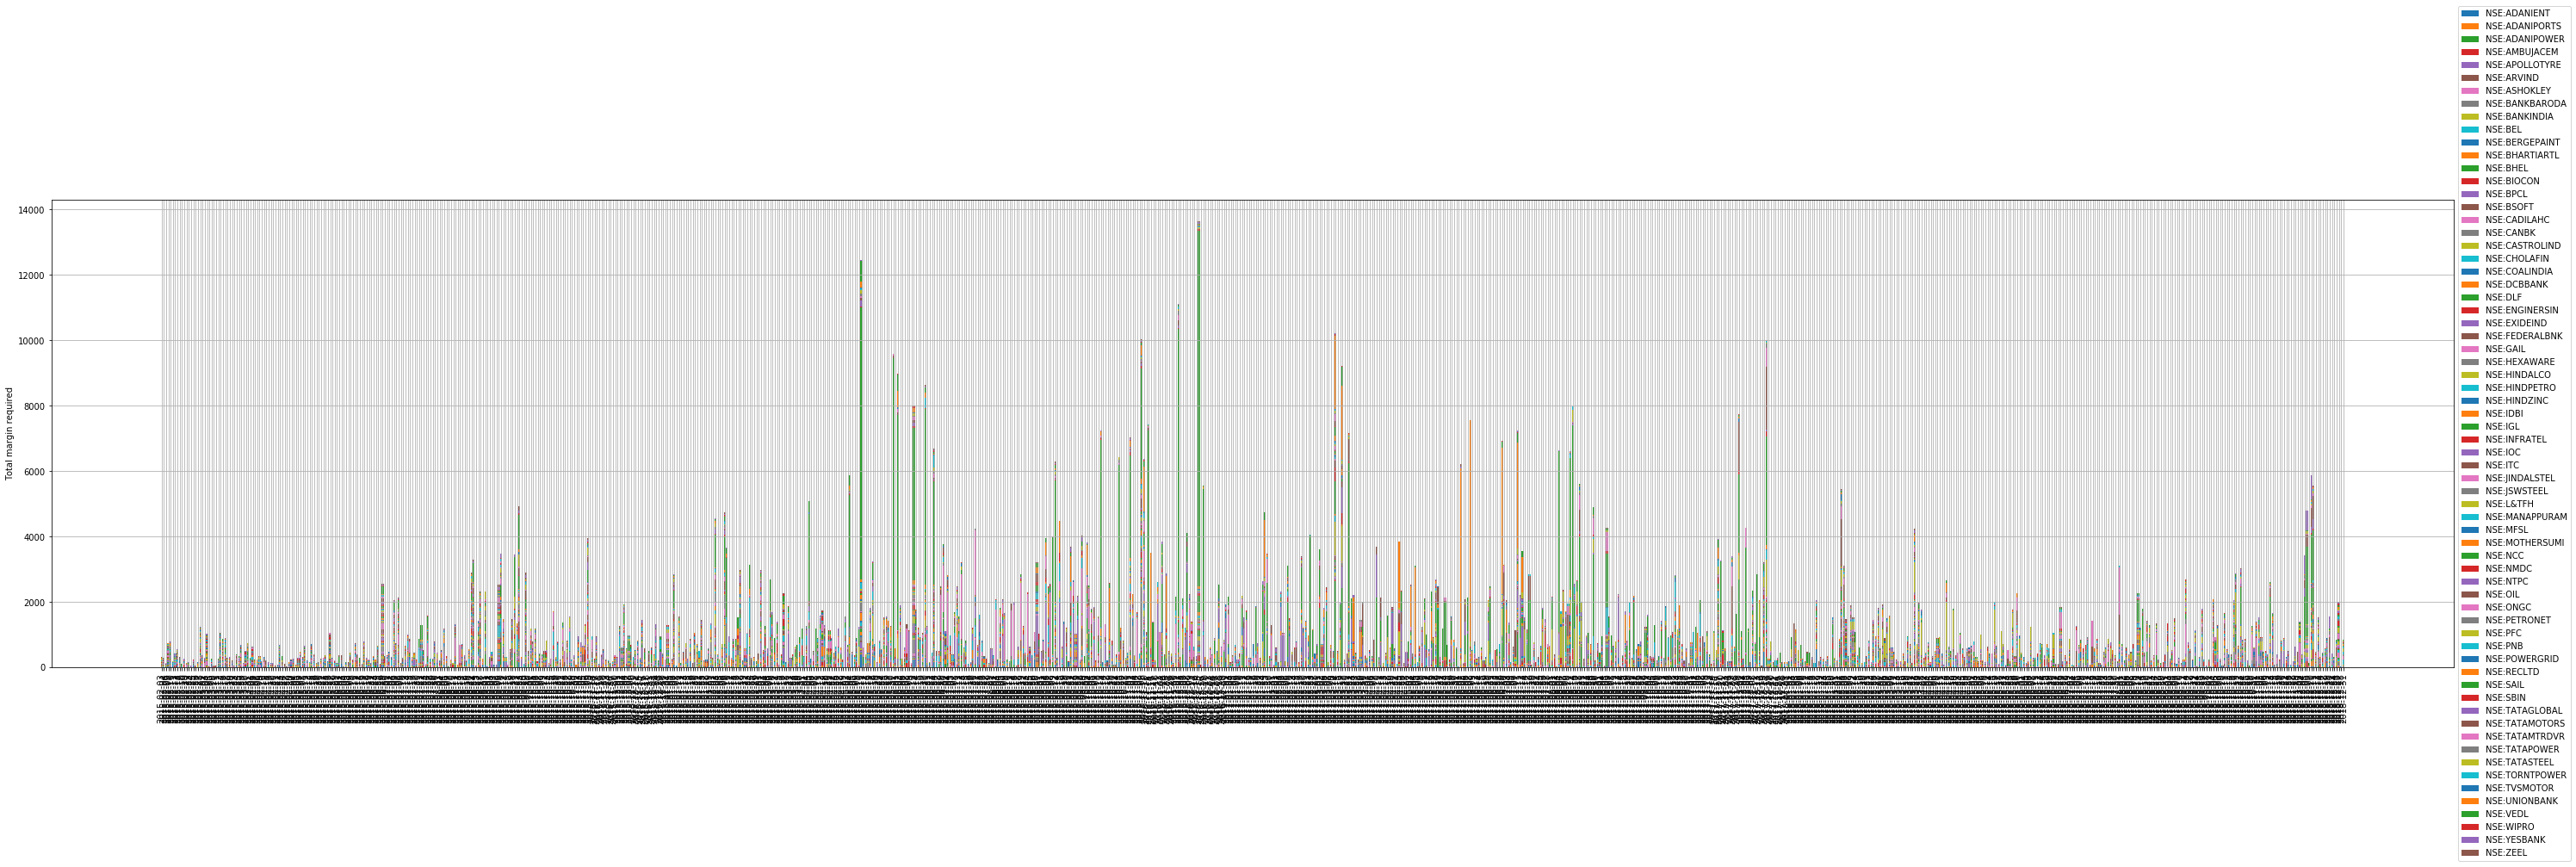

In [28]:
df2 = all_trades.groupby(['date', 'instrument'])['margin_required'].sum().unstack('instrument').fillna(0)

df = df2.transpose()

plt.figure(figsize=(50, 10))

series_labels = df.index.tolist()

data = df.values

category_labels = df.columns.tolist()

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False,
    value_format="{:.1f}",
    y_label="Total margin required"
)

plt.savefig('margin_required_opp_brokerage_return_{}_{}.png'.format(from_year, to_year))
plt.show()

## Brokerage Calculation

In [21]:
# brokerage = min(40, 0.0002 * budget_required)
# stt = 0.00025 * budget_required
# transaction_charges = 2 * 0.0000325 * budget_required
# gst = 0.18 * (brokerage + transaction_charges)
# sebi = 2 * 10 * budget_required/10000000
# total_tax_and_charges = brokerage + stt + transaction_charges + gst + sebi

# profit = profit - total_tax_and_charges

# Postmartem

In [38]:
all_trades.instrument.nunique()

66

In [39]:
set(budget_df.instrument.unique().tolist())-set(all_trades.instrument.unique().tolist())

{'NSE:EQUITAS', 'NSE:GLENMARK', 'NSE:ICICIPRULI', 'NSE:UJJIVAN'}

In [40]:
all_trades[all_trades['open_today']>120].instrument.nunique()

62

In [41]:
less_100 = all_trades[all_trades['low_prev']<100].instrument.unique().tolist()

In [42]:
len(less_100)

36

In [43]:
low_trades[low_trades['budget_required']==low_trades.budget_required.max()]

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab
6788,NSE:TATAMOTORS,409.0,404.3,397.8,low,buy,62,17,400.0,0.05,0.0,1461.51,73,29039.4,398.2,398.0,19.9,19.9,62,2017-12-18 15:09:00+05:30,SL,complete,573.05,0.4,0,888.46


In [44]:
d = low_trades[low_trades['instrument']=='NSE:TATAMOTORS']

In [45]:
d

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab
6627,NSE:TATAMOTORS,570.30,552.20,548.00,low,buy,1,1,400.0,0.05,20.0,20.68,1,548.00,548.55,548.25,27.4,27.4,1,2015-02-09 15:09:00+05:30,SL,complete,-5.80,-0.2,0,26.48
6629,NSE:TATAMOTORS,568.80,551.25,547.25,low,buy,2,2,400.0,0.05,0.0,27.38,1,547.25,547.80,547.50,27.4,27.4,2,2015-03-20 15:09:00+05:30,SL,complete,-1.20,-0.0,0,28.58
6630,NSE:TATAMOTORS,545.60,533.50,530.00,low,buy,3,3,400.0,0.05,0.0,29.55,1,530.00,530.55,530.25,26.5,26.5,3,2015-03-26 15:09:00+05:30,SL,complete,-5.20,-0.2,0,34.75
6634,NSE:TATAMOTORS,508.45,495.80,493.50,low,buy,4,4,400.0,0.05,0.0,35.93,1,493.50,494.00,493.75,24.7,24.7,4,2015-05-07 15:09:00+05:30,SL,complete,-7.00,-0.3,0,42.93
6637,NSE:TATAMOTORS,506.00,493.60,472.00,low,buy,5,5,400.0,0.05,0.0,44.38,2,944.00,472.45,472.25,23.6,23.6,5,2015-05-27 15:09:00+05:30,SL,complete,-2.30,-0.0,0,46.68
6638,NSE:TATAMOTORS,449.00,439.50,435.90,low,buy,6,6,400.0,0.05,0.0,48.26,2,871.80,436.35,436.10,21.8,21.8,6,2015-06-08 15:09:00+05:30,SL,complete,-1.40,-0.0,0,49.66
6639,NSE:TATAMOTORS,446.50,428.50,428.00,low,buy,7,7,400.0,0.05,0.0,51.34,2,856.00,428.45,428.20,21.4,21.4,7,2015-06-12 15:09:00+05:30,SL,complete,-13.60,-0.3,0,64.94
6641,NSE:TATAMOTORS,438.70,431.80,428.00,low,buy,8,8,400.0,0.05,0.0,67.14,3,1284.00,428.45,428.20,21.4,21.4,8,2015-06-29 15:09:00+05:30,SL,complete,-0.90,-0.0,0,68.04
6642,NSE:TATAMOTORS,435.80,430.50,427.05,low,buy,9,9,400.0,0.05,0.0,70.35,3,1281.15,427.50,427.25,21.4,21.4,9,2015-07-06 15:09:00+05:30,SL,complete,16.80,0.3,0,53.55
6644,NSE:TATAMOTORS,422.30,400.00,399.90,low,buy,10,10,400.0,0.05,0.0,55.36,3,1199.70,400.30,400.10,20.0,20.0,10,2015-07-09 15:09:00+05:30,SL,complete,-7.95,-0.1,0,63.31


In [46]:
df_U = get_clean_data('NSE:TATAMOTORS', 2015, 2018)

NSE:TATAMOTORS
2015
84724
           date  close  timestamp  high  low  open  volume  day
193  2015-11-11     62         62    62   62    62      62   62
225.76533333333333
2016
91935
           date  close  timestamp  high  low  open  volume  day
202  2016-10-30     60         60    60   60    60      60   60
245.0
2017
92490
           date  close  timestamp  high  low  open  volume  day
128  2017-07-10    180        180   180  180   180     180  180
198  2017-10-19     60         60    60   60    60      60   60
246.0
2018
91935
           date  close  timestamp  high  low  open  volume  day
210  2018-11-07     60         60    60   60    60      60   60
245.0


In [47]:
df_U.head()

,close,timestamp,high,low,open,volume,date,day,instrument
0,588.75,2015-02-02 09:15:00+05:30,589.7,586.55,586.60,91194,2015-02-02,Monday,NSE:TATAMOTORS
1,586.00,2015-02-02 09:16:00+05:30,588.7,586.00,588.60,34590,2015-02-02,Monday,NSE:TATAMOTORS
2,585.45,2015-02-02 09:17:00+05:30,586.0,585.20,586.00,20663,2015-02-02,Monday,NSE:TATAMOTORS
3,584.90,2015-02-02 09:18:00+05:30,585.5,584.85,585.45,12261,2015-02-02,Monday,NSE:TATAMOTORS
4,584.95,2015-02-02 09:19:00+05:30,585.3,584.90,584.90,12711,2015-02-02,Monday,NSE:TATAMOTORS


In [48]:
df_U[(df_U['timestamp']>'2015-02-28 13:40:00+05:30') & (df_U['timestamp']<'2015-02-28 13:59:00+05:30')]

,close,timestamp,high,low,open,volume,date,day,instrument
7391,581.60,2015-02-28 13:41:00+05:30,582.70,581.25,581.35,15967,2015-02-28,Saturday,NSE:TATAMOTORS
7392,580.10,2015-02-28 13:42:00+05:30,582.25,580.00,582.25,10061,2015-02-28,Saturday,NSE:TATAMOTORS
7393,580.10,2015-02-28 13:43:00+05:30,580.80,580.00,580.00,2295,2015-02-28,Saturday,NSE:TATAMOTORS
7394,579.25,2015-02-28 13:44:00+05:30,580.50,579.25,580.10,2412,2015-02-28,Saturday,NSE:TATAMOTORS
7395,579.15,2015-02-28 13:45:00+05:30,579.70,578.30,578.30,7820,2015-02-28,Saturday,NSE:TATAMOTORS
7396,579.60,2015-02-28 13:46:00+05:30,580.00,579.05,579.15,2542,2015-02-28,Saturday,NSE:TATAMOTORS
7397,580.65,2015-02-28 13:47:00+05:30,581.35,579.85,580.80,5503,2015-02-28,Saturday,NSE:TATAMOTORS
7398,579.65,2015-02-28 13:48:00+05:30,580.35,579.30,579.60,3636,2015-02-28,Saturday,NSE:TATAMOTORS
7399,580.00,2015-02-28 13:49:00+05:30,580.10,578.60,579.50,5004,2015-02-28,Saturday,NSE:TATAMOTORS
7400,579.25,2015-02-28 13:50:00+05:30,580.15,578.75,579.00,14480,2015-02-28,Saturday,NSE:TATAMOTORS
